In [1]:
import numpy;import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [2]:
all_df = pd.read_excel("titanic3.xls")
cols=['survived','name','pclass' ,'sex', 'age', 'sibsp',
      'parch', 'fare', 'embarked']
all_df=all_df[cols]

In [3]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk];test_df = all_df[~msk]

In [4]:
def PreprocessData(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["embarked" ])
    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    return scaledFeatures,Label

In [5]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

# 3. Create Model 

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(units=80, input_dim=9, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dense(units=60, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))
print(model.summary())

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                800       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 5,721
Trainable params: 5,721
Non-trainable params: 0
_________________________________________________________________
None


# 4. Train model

In [7]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [8]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 0s - loss: 0.6812 - acc: 0.5882 - val_loss: 0.6160 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6159 - acc: 0.6602 - val_loss: 0.4893 - val_acc: 0.8077
Epoch 3/30
 - 0s - loss: 0.5342 - acc: 0.7667 - val_loss: 0.4607 - val_acc: 0.7788
Epoch 4/30
 - 0s - loss: 0.5026 - acc: 0.7484 - val_loss: 0.4611 - val_acc: 0.7885
Epoch 5/30
 - 0s - loss: 0.4862 - acc: 0.7656 - val_loss: 0.4534 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.4799 - acc: 0.7688 - val_loss: 0.4382 - val_acc: 0.7981
Epoch 7/30
 - 0s - loss: 0.4736 - acc: 0.7667 - val_loss: 0.4333 - val_acc: 0.7788
Epoch 8/30
 - 0s - loss: 0.4714 - acc: 0.7677 - val_loss: 0.4274 - val_acc: 0.7981
Epoch 9/30
 - 0s - loss: 0.4685 - acc: 0.7731 - val_loss: 0.4239 - val_acc: 0.8077
Epoch 10/30
 - 0s - loss: 0.4660 - acc: 0.7806 - val_loss: 0.4252 - val_acc: 0.7885
Epoch 11/30
 - 0s - loss: 0.4610 - acc: 0.7753 - val_loss: 0.4217 - val_acc: 0.8077
Epoch 12/30
 - 0s - loss: 0.4608 - acc:

# 6. Print History

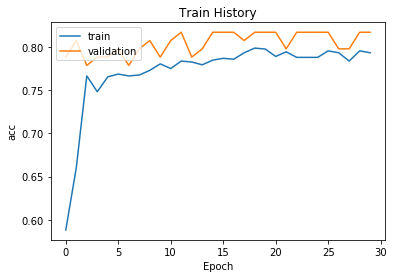

In [9]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(train_history,'acc','val_acc')

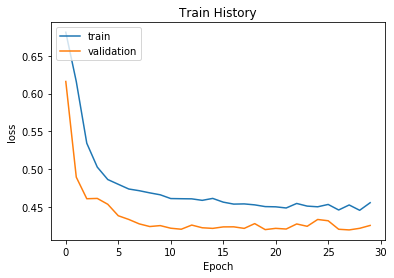

In [10]:
show_train_history(train_history,'loss','val_loss')

In [11]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)
print(scores[1])

275/275 [==============================] - 0s 43us/step
0.803636364069852


# 预测数据

# 加入Jack & Rose数据

In [13]:
#加入Jack & Rose数据,进行预测
Jack = pd.Series([0 ,'Jack',3, 'male'  , 23, 1, 0,  5.0000,'S'])
Rose = pd.Series([1 ,'Rose',1, 'female', 20, 1, 0, 100.0000,'S'])

In [14]:
JR_df = pd.DataFrame([list(Jack),list(Rose)],  
                  columns=['survived', 'name','pclass', 'sex', 
                   'age', 'sibsp','parch', 'fare','embarked'])

In [15]:
all_df=pd.concat([all_df,JR_df])

In [16]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


# 进行预测

In [17]:
all_Features,Label=PreprocessData(all_df)

In [18]:
all_probability=model.predict(all_Features)

In [19]:
all_probability[:10]

array([[0.9742587 ],
       [0.6693111 ],
       [0.9744076 ],
       [0.39783973],
       [0.9712522 ],
       [0.26663923],
       [0.94501126],
       [0.3471673 ],
       [0.9478666 ],
       [0.25435448]], dtype=float32)

In [20]:
pd=all_df
pd.insert(len(all_df.columns),
          'probability',all_probability)
#查看Jack & Rose数据的生存几率
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.153419
1,1,Rose,1,female,20.0,1,0,100.0,S,0.968450


In [21]:
#查看生存几率高，却没有存活
print(pd[(pd['survived']==0) &  (pd['probability']>0.9) ])

     survived                                             name  pclass  \
2           0                     Allison, Miss. Helen Loraine       1   
4           0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)       1   
105         0                         Evans, Miss. Edith Corse       1   
169         0                       Isham, Miss. Ann Elizabeth       1   
286         0           Straus, Mrs. Isidor (Rosalie Ida Blun)       1   

        sex   age  sibsp  parch      fare embarked  probability  
2    female   2.0      1      2  151.5500        S     0.974408  
4    female  25.0      1      2  151.5500        S     0.971252  
105  female  36.0      0      0   31.6792        C     0.973590  
169  female  50.0      0      0   28.7125        C     0.970012  
286  female  63.0      1      0  221.7792        S     0.959433  


In [22]:
try:
    model.save('titanic_mlp_model.h5')
    print('模型保存成功！，以后可以直接载入模型，不用再定义网络和编译模型！')
except:
    print('模型保存失败！')


模型保存成功！，以后可以直接载入模型，不用再定义网络和编译模型！
